1. Importing the required Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

2. Loading the Dataset

In [4]:
df = pd.read_csv("/Data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


3. Dataset Overview

In [26]:
df.shape
df.columns
df.dtypes

,0
PatientID,int64
Age,float64
Ethnicity,int64
EducationLevel,int64
BMI,float64
...,...
AlcoholConsumption_19.97444257,bool
AlcoholConsumption_19.98401842,bool
AlcoholConsumption_19.98562151,bool
AlcoholConsumption_19.98829132,bool


4. Statistical Summary

In [12]:
print(df.describe())
print(df.describe(include=['object', 'category']))

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

5. Missing Data Analysis

In [13]:
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

6. Univariate Analysis

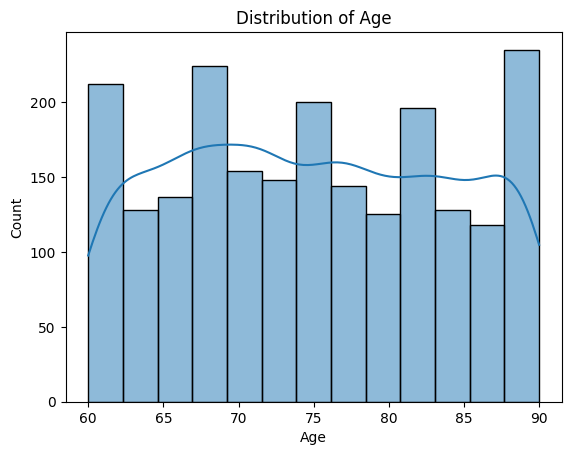

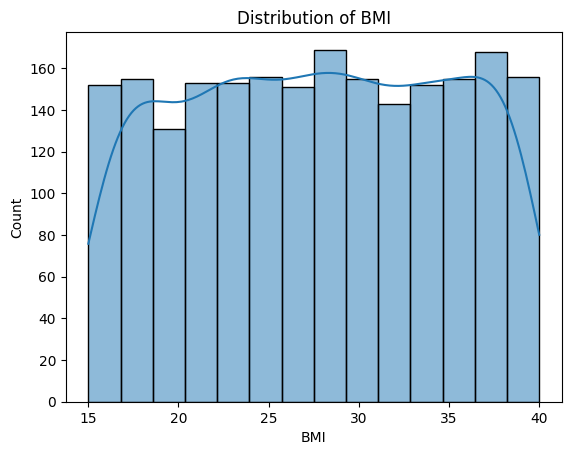

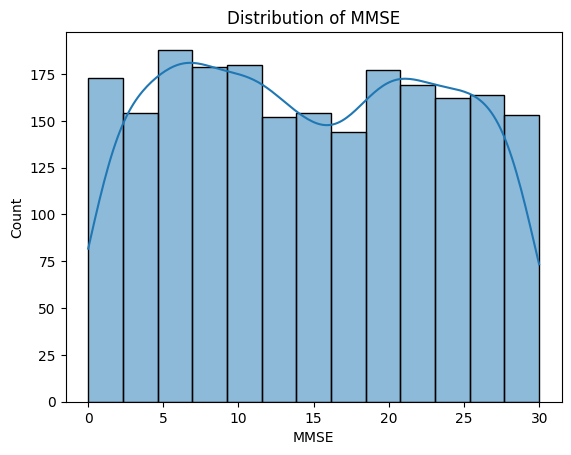

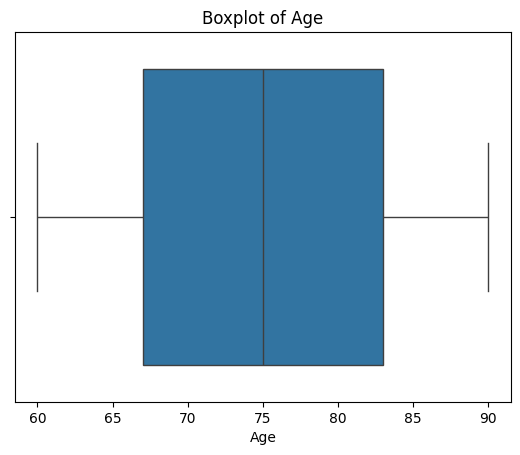

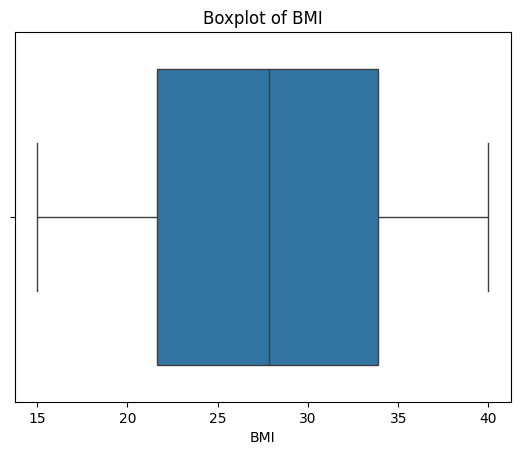

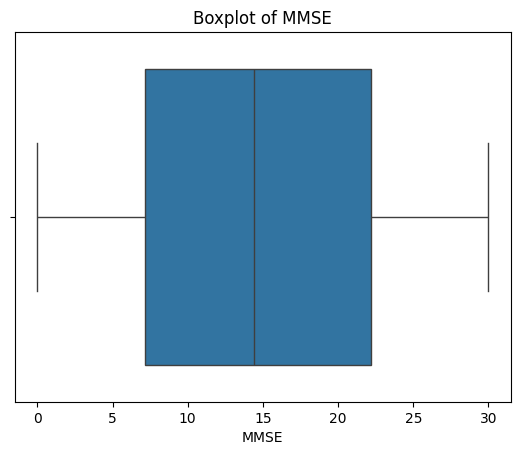

In [15]:
for col in ['Age', 'BMI', 'MMSE']:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

for col in ['Age', 'BMI', 'MMSE']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

7. Categorical Data Exploration

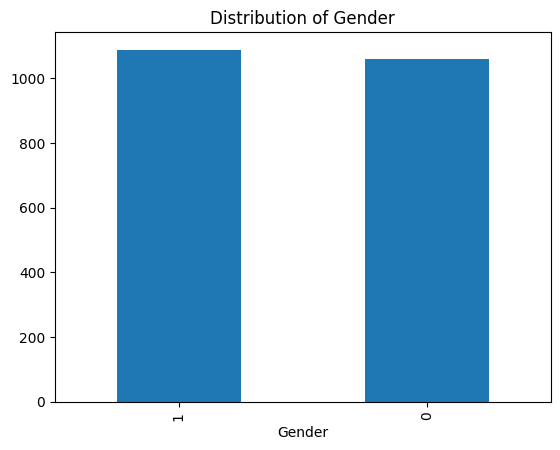

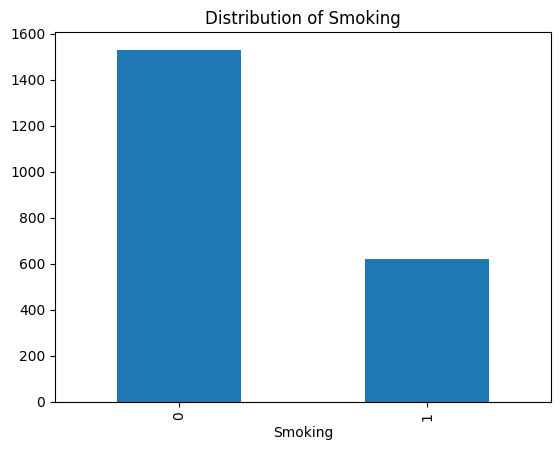

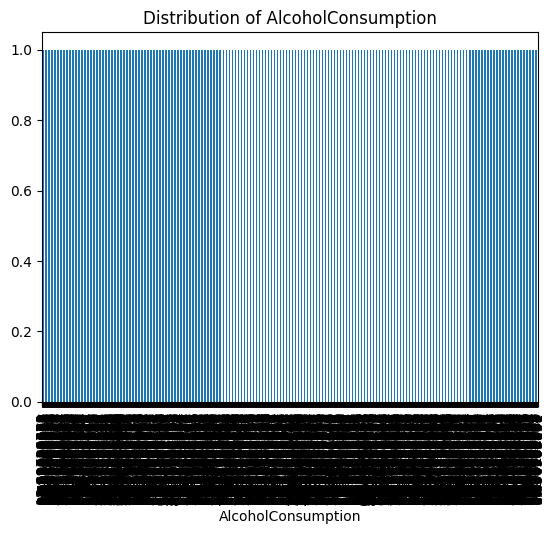

In [16]:
for col in ['Gender', 'Smoking', 'AlcoholConsumption']:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')

8. Target Label Distribution

Text(0.5, 1.0, 'Distribution of Diagnosis')

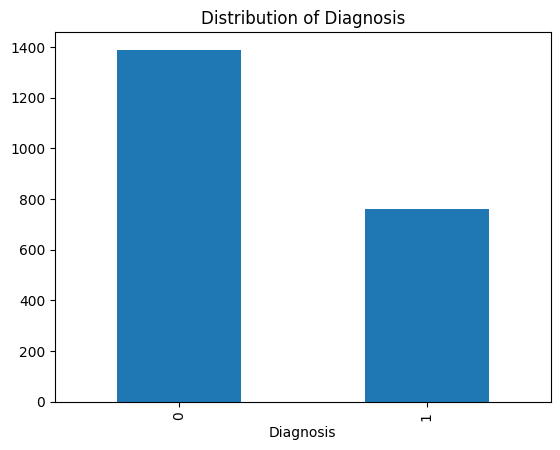

In [17]:
df['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')

9. Correlation Analysis (Numerical Features)

Text(0.5, 1.0, 'Correlation Matrix')

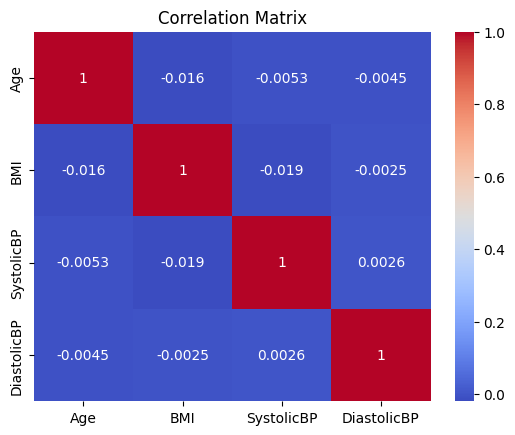

In [18]:
correlation_matrix = df[['Age', 'BMI', 'SystolicBP', 'DiastolicBP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

10. Bivariate Analysis (Numerical vs. Diagnosis)

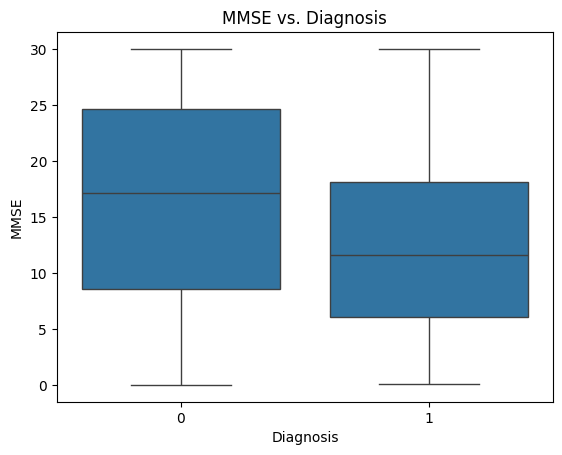

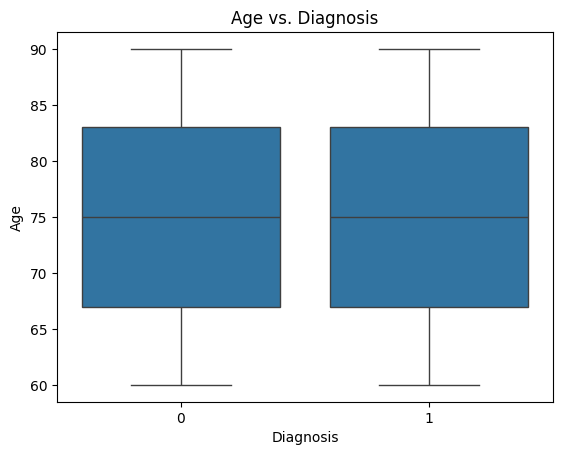

In [19]:
for col in ['MMSE', 'Age']:
    plt.figure()
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'{col} vs. Diagnosis')

11. Bivariate Analysis (Categorical vs. Diagnosis)

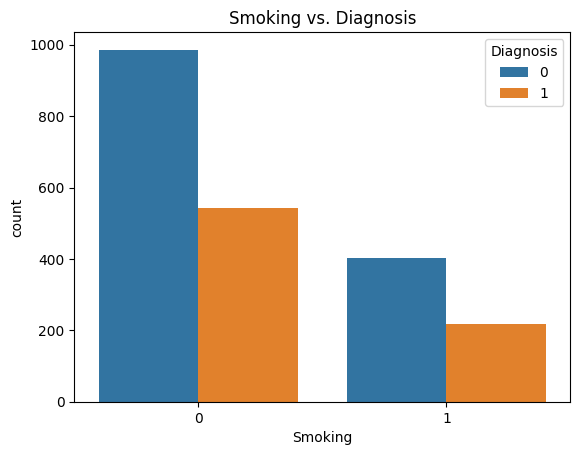

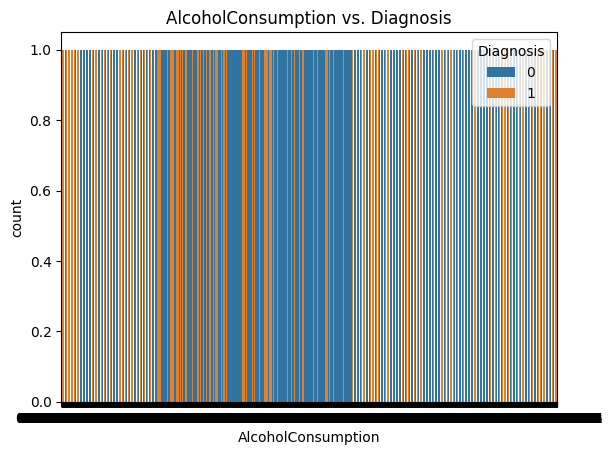

In [20]:
for col in ['Smoking', 'AlcoholConsumption']:
    plt.figure()
    sns.countplot(x=col, hue='Diagnosis', data=df)
    plt.title(f'{col} vs. Diagnosis')

12.Feature Scaling

In [23]:
numerical_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'MMSE']

# Standardization
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,-0.212368,0,0,2,-0.655225,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,1.567757,0,0,0,-0.114751,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,-0.212368,0,3,1,-1.366428,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,-0.101111,1,0,1,0.851625,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,1.567757,0,0,0,-0.961607,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,-1.547463,0,0,1,1.589030,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,0.010147,0,0,2,-1.357833,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,0.232663,0,0,1,-1.687864,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,0.343921,1,3,1,-1.712334,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


13. Handling Categorical Variables

In [24]:
df = pd.get_dummies(df, columns=['Gender', 'Smoking', 'AlcoholConsumption'], drop_first=True)

In [25]:
df

,PatientID,Age,Ethnicity,EducationLevel,BMI,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,AlcoholConsumption_19.95486109,AlcoholConsumption_19.96088756,AlcoholConsumption_19.96667036,AlcoholConsumption_19.96687514,AlcoholConsumption_19.9729271,AlcoholConsumption_19.97444257,AlcoholConsumption_19.98401842,AlcoholConsumption_19.98562151,AlcoholConsumption_19.98829132,AlcoholConsumption_19.98929336
0,4751,-0.212368,0,2,-0.655225,6.327112,1.347214,9.025679,0,0,...,False,False,False,False,False,False,False,False,False,False
1,4752,1.567757,0,0,-0.114751,7.619885,0.518767,7.151293,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4753,-0.212368,3,1,-1.366428,7.844988,1.826335,9.673574,1,0,...,False,False,False,False,False,False,False,False,False,False
3,4754,-0.101111,0,1,0.851625,8.428001,7.435604,8.392554,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4755,1.567757,0,0,-0.961607,6.310461,0.795498,5.597238,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,-1.547463,0,1,1.589030,4.049964,6.555306,7.535540,0,0,...,False,False,False,False,False,False,False,False,False,False
2145,6896,0.010147,0,2,-1.357833,1.360667,2.904662,8.555256,0,0,...,False,False,False,False,False,False,False,False,False,False
2146,6897,0.232663,0,1,-1.687864,9.886002,8.120025,5.769464,0,0,...,False,False,False,False,False,False,False,False,False,False
2147,6898,0.343921,3,1,-1.712334,6.354282,1.263427,8.322874,0,1,...,False,False,False,False,False,False,False,False,False,False


14. Handling Outliers

In [28]:
for col in ['Age', 'BMI', 'MMSE']:  # Replace with relevant numerical features
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with upper or lower bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

df


,PatientID,Age,Ethnicity,EducationLevel,BMI,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,AlcoholConsumption_19.95486109,AlcoholConsumption_19.96088756,AlcoholConsumption_19.96667036,AlcoholConsumption_19.96687514,AlcoholConsumption_19.9729271,AlcoholConsumption_19.97444257,AlcoholConsumption_19.98401842,AlcoholConsumption_19.98562151,AlcoholConsumption_19.98829132,AlcoholConsumption_19.98929336
0,4751,-0.212368,0,2,-0.655225,6.327112,1.347214,9.025679,0,0,...,False,False,False,False,False,False,False,False,False,False
1,4752,1.567757,0,0,-0.114751,7.619885,0.518767,7.151293,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4753,-0.212368,3,1,-1.366428,7.844988,1.826335,9.673574,1,0,...,False,False,False,False,False,False,False,False,False,False
3,4754,-0.101111,0,1,0.851625,8.428001,7.435604,8.392554,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4755,1.567757,0,0,-0.961607,6.310461,0.795498,5.597238,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,-1.547463,0,1,1.589030,4.049964,6.555306,7.535540,0,0,...,False,False,False,False,False,False,False,False,False,False
2145,6896,0.010147,0,2,-1.357833,1.360667,2.904662,8.555256,0,0,...,False,False,False,False,False,False,False,False,False,False
2146,6897,0.232663,0,1,-1.687864,9.886002,8.120025,5.769464,0,0,...,False,False,False,False,False,False,False,False,False,False
2147,6898,0.343921,3,1,-1.712334,6.354282,1.263427,8.322874,0,1,...,False,False,False,False,False,False,False,False,False,False


15. Standardize or Normalize Numerical Features

In [30]:
scaler = StandardScaler()
numerical_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'MMSE']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,PatientID,Age,Ethnicity,EducationLevel,BMI,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,AlcoholConsumption_19.95486109,AlcoholConsumption_19.96088756,AlcoholConsumption_19.96667036,AlcoholConsumption_19.96687514,AlcoholConsumption_19.9729271,AlcoholConsumption_19.97444257,AlcoholConsumption_19.98401842,AlcoholConsumption_19.98562151,AlcoholConsumption_19.98829132,AlcoholConsumption_19.98929336
0,4751,-0.212368,0,2,-0.655225,6.327112,1.347214,9.025679,0,0,...,False,False,False,False,False,False,False,False,False,False
1,4752,1.567757,0,0,-0.114751,7.619885,0.518767,7.151293,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4753,-0.212368,3,1,-1.366428,7.844988,1.826335,9.673574,1,0,...,False,False,False,False,False,False,False,False,False,False
3,4754,-0.101111,0,1,0.851625,8.428001,7.435604,8.392554,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4755,1.567757,0,0,-0.961607,6.310461,0.795498,5.597238,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,-1.547463,0,1,1.589030,4.049964,6.555306,7.535540,0,0,...,False,False,False,False,False,False,False,False,False,False
2145,6896,0.010147,0,2,-1.357833,1.360667,2.904662,8.555256,0,0,...,False,False,False,False,False,False,False,False,False,False
2146,6897,0.232663,0,1,-1.687864,9.886002,8.120025,5.769464,0,0,...,False,False,False,False,False,False,False,False,False,False
2147,6898,0.343921,3,1,-1.712334,6.354282,1.263427,8.322874,0,1,...,False,False,False,False,False,False,False,False,False,False


**TASK-2: MODEL BUILDING** **bold text**

In [60]:
df=pd.read_csv("/Data.csv")

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

1. Pre Processing the Data Again for RF

In [62]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

non_numeric_cols = df.select_dtypes(include=['object']).columns


for col in non_numeric_cols:
    if col != 'Diagnosis':
        df[col] = LabelEncoder().fit_transform(df[col])

if df['Diagnosis'].dtype == 'object':
    df['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])


2. Train Test Split

In [63]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



5. Cross Validation

In [64]:
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores.mean(), cv_scores.std()))


Cross-Validation Accuracy: 0.93 ± 0.01


4. Hyperparameter Tunnig

In [65]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Report best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9383466675706827


5. Model Evaluation on Test Data

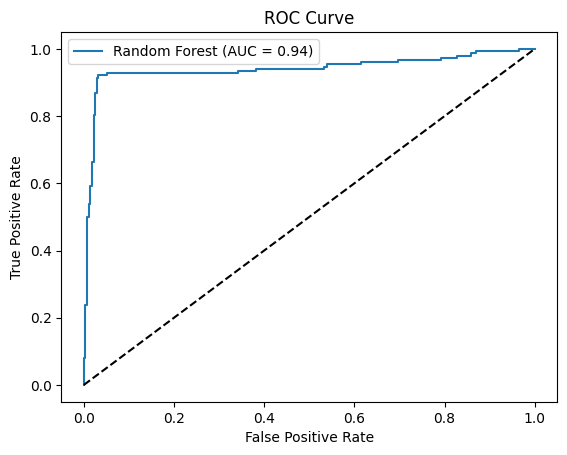

Optimal Threshold: 0.4144845697674645
Confusion Matrix:
 [[269   9]
 [ 12 140]]
Accuracy: 0.9511627906976744
Sensitivity: 0.9210526315789473
Specificity: 0.9676258992805755


In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score
# Train Random Forest with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict probabilities and calculate ROC curve
y_pred_probs = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Find optimal threshold (maximum F1 score)
from sklearn.metrics import f1_score

f1_scores = [f1_score(y_test, (y_pred_probs >= thresh).astype(int)) for thresh in thresholds]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Metrics: Accuracy, Sensitivity, Specificity
accuracy = accuracy_score(y_test, y_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)